# Modelo


In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
import pickle
import os
import pandas as pd

In [42]:
model_path = os.path.join('/content/drive/MyDrive/PROYECTO_IA/InteligenciaArtificial/ModelMean.sav')
with open(model_path, 'rb') as model_file:
    gbc = pickle.load(model_file)

In [43]:
model_scalerpath = '/content/drive/MyDrive/PROYECTO_IA/InteligenciaArtificial/scaler_ModelMean.sav'
with open(model_scalerpath, 'rb') as model_file:
    scaler = pickle.load(model_file)

In [44]:
gbc.estimators_[0]

array([DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                             random_state=RandomState(MT19937) at 0x78C262FB6440)],
      dtype=object)

In [45]:
estimator = gbc.estimators_[0, 0]

In [46]:
estimator.score

<bound method RegressorMixin.score of DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      random_state=RandomState(MT19937) at 0x78C262FB6440)>

[Text(0.5, 0.875, 'concave points_mean <= 0.08\nfriedman_mse = 1.0\nsamples = 398\nvalue = -0.0'),
 Text(0.25, 0.625, 'area_mean <= 0.1\nfriedman_mse = 0.21\nsamples = 245\nvalue = -0.66'),
 Text(0.125, 0.375, 'texture_mean <= 0.57\nfriedman_mse = 0.12\nsamples = 233\nvalue = -0.71'),
 Text(0.0625, 0.125, 'friedman_mse = 0.04\nsamples = 196\nvalue = -0.97'),
 Text(0.1875, 0.125, 'friedman_mse = 0.5\nsamples = 37\nvalue = -0.59'),
 Text(0.375, 0.375, 'texture_mean <= -0.71\nfriedman_mse = 1.07\nsamples = 12\nvalue = 0.26'),
 Text(0.3125, 0.125, 'friedman_mse = 0.0\nsamples = 4\nvalue = -1.0'),
 Text(0.4375, 0.125, 'friedman_mse = 0.8\nsamples = 8\nvalue = 0.67'),
 Text(0.75, 0.625, 'texture_mean <= -1.19\nfriedman_mse = 0.42\nsamples = 153\nvalue = 1.06'),
 Text(0.625, 0.375, 'concavity_mean <= 1.11\nfriedman_mse = 0.47\nsamples = 8\nvalue = -0.52'),
 Text(0.5625, 0.125, 'friedman_mse = 0.0\nsamples = 7\nvalue = -1.0'),
 Text(0.6875, 0.125, 'friedman_mse = 0.0\nsamples = 1\nvalue = 1.0'

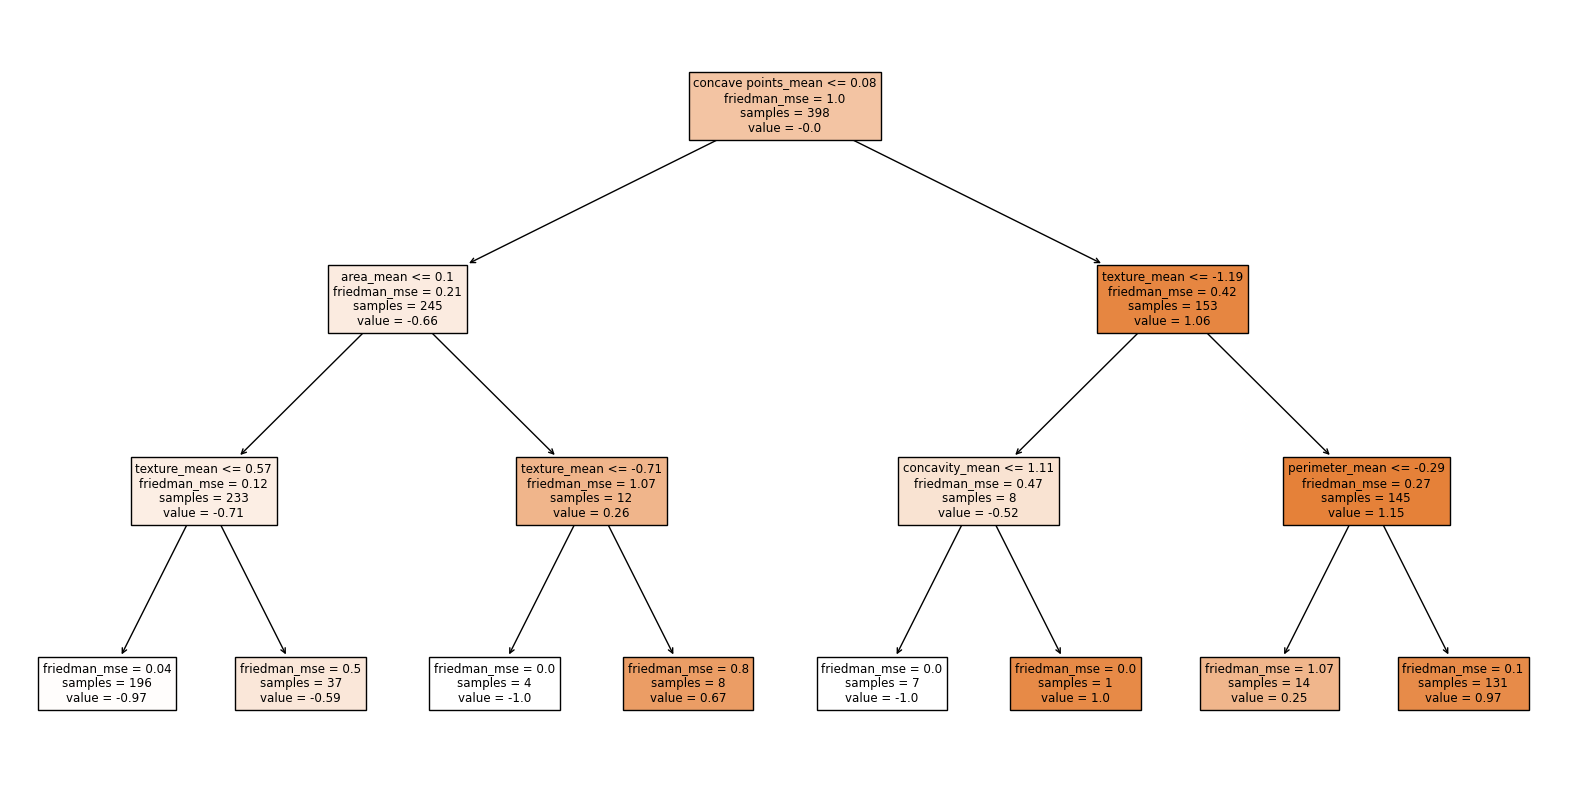

In [47]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Asumiendo que `gbc` es tu modelo GradientBoostingClassifier ya entrenado
# Seleccionamos el primer árbol del primer stage de boosting
estimator = gbc.estimators_[0, 0]

columns = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean',
            'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
# Configuramos el tamaño de la figura
tree = plt.figure(figsize=(20,10))

# Dibujamos el árbol
tree = plot_tree(estimator, filled=True, feature_names=columns, proportion=False, precision=2)

# Mostramos el gráfico
tree


#PRUEBAS

In [48]:
model_path = os.path.join('/content/drive/MyDrive/PROYECTO_IA/InteligenciaArtificial/ModelMean.sav')
with open(model_path, 'rb') as model_file:
    gbc = pickle.load(model_file)

In [49]:
model_scalerpath = '/content/drive/MyDrive/PROYECTO_IA/InteligenciaArtificial/scaler_ModelMean.sav'
with open(model_scalerpath, 'rb') as model_file:
    scaler = pickle.load(model_file)

In [50]:
df = pd.read_csv('/content/drive/MyDrive/PROYECTO_IA/InteligenciaArtificial/data.csv')

In [51]:
feature_names =['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean',
            'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
df = df[feature_names]
new_data1 = pd.DataFrame(columns=feature_names)
new_data1.loc[0] =  df.loc[19]
new_data1

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,B,13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766


In [52]:
max(df['radius_mean'])

28.11

In [53]:
## Generar Data Random
import numpy as np
feature_names =['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean',
            'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
df_random = pd.DataFrame(columns=feature_names)
for col in feature_names:
  df_random[col] = np.random.uniform(min(df[col]), max(df[col]),200)


In [54]:
df_random = df_random.round(3)

In [55]:
df_randomScaler = scaler.transform(df_random)
probabilities = gbc.predict_proba(df_randomScaler)

In [56]:
probabilities = probabilities.round(3)

In [57]:
# Convertir a DataFrame y añadir columnas para etiquetas
df_probabilities = pd.DataFrame(probabilities, columns=['Prob_B', 'Prob_M'])

In [58]:
df_final = pd.concat([df_random, df_probabilities], axis=1)

# Seleccionar filas donde ninguna probabilidad excede 90%
df_filtado = df_final[
    ((df_final['Prob_B'] <= 0.8) & (df_final['Prob_B'] >= 0.2)) |
    ((df_final['Prob_M'] <= 0.8) & (df_final['Prob_M'] >= 0.2))
]

# Unir los datos simulados con las probabilidades filtradas


#df_filtado.reset_index(drop=True).to_csv('/content/drive/MyDrive/PROYECTO_IA/InteligenciaArtificial/RandomValues2.csv',index=False)

In [59]:
random_values1 = pd.read_csv('/content/drive/MyDrive/PROYECTO_IA/InteligenciaArtificial/RandomValues1.csv')
random_values1

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,Prob_B,Prob_M
0,15.337,13.179,187.691,2240.727,0.153,0.114,0.047,0.178,0.251,0.053,0.383,0.617
1,9.719,10.201,103.487,913.597,0.059,0.261,0.188,0.121,0.291,0.095,0.593,0.407
2,20.691,10.284,162.890,486.244,0.098,0.222,0.146,0.096,0.301,0.076,0.431,0.569
3,17.384,24.784,47.915,415.175,0.140,0.164,0.036,0.074,0.231,0.076,0.533,0.467
4,14.932,17.603,177.463,1079.751,0.112,0.146,0.037,0.043,0.237,0.061,0.688,0.312
5,15.072,14.801,104.870,993.022,0.140,0.040,0.157,0.021,0.158,0.063,0.559,0.441
6,20.006,35.341,78.063,2236.676,0.072,0.315,0.097,0.029,0.167,0.097,0.580,0.420
7,21.193,10.531,94.538,1913.348,0.124,0.168,0.013,0.189,0.213,0.064,0.246,0.754
8,18.324,10.190,52.335,457.753,0.090,0.169,0.254,0.150,0.169,0.060,0.243,0.757
9,19.473,23.396,92.113,203.392,0.056,0.345,0.187,0.168,0.120,0.089,0.210,0.790


In [60]:
random_values2 = pd.read_csv('/content/drive/MyDrive/PROYECTO_IA/InteligenciaArtificial/RandomValues2.csv')
random_values2

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,Prob_B,Prob_M
0,15.475,19.200,92.159,1604.052,0.110,0.200,0.215,0.033,0.117,0.067,0.528,0.472
1,20.816,31.571,135.946,1531.420,0.079,0.216,0.019,0.031,0.283,0.080,0.456,0.544
2,20.509,20.300,83.147,1552.413,0.054,0.322,0.090,0.117,0.108,0.084,0.291,0.709
3,15.297,35.442,176.881,1190.735,0.153,0.252,0.265,0.027,0.148,0.051,0.408,0.592
4,14.623,26.485,44.998,644.015,0.060,0.022,0.122,0.161,0.143,0.077,0.247,0.753
5,9.948,11.136,93.737,1615.493,0.125,0.249,0.002,0.102,0.224,0.064,0.278,0.722
6,14.366,20.836,47.645,276.763,0.083,0.281,0.414,0.103,0.216,0.067,0.439,0.561
7,16.961,10.267,174.020,1808.708,0.076,0.108,0.347,0.104,0.164,0.090,0.281,0.719
8,18.052,12.863,172.139,1047.306,0.110,0.202,0.403,0.042,0.281,0.062,0.504,0.496
9,27.812,35.901,136.223,281.460,0.072,0.335,0.386,0.165,0.184,0.076,0.459,0.541


In [61]:
df_random_values = pd.concat([random_values1,random_values2],axis=0)
df_random_values =df_random_values.reset_index(drop=True)
#df_random_values.to_csv('/content/drive/MyDrive/PROYECTO_IA/InteligenciaArtificial/RandomValuesOriginal.csv',index=False)

# PROBABILIDADES ARBOLES DE DECISIÓN

In [62]:
df_filtrado = pd.DataFrame(columns=df_random_values.columns)
df_filtrado.loc[0] = df_random_values.loc[0]
df_filtrado = df_filtrado[feature_names]

In [63]:
df_filtrado

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,15.337,13.179,187.691,2240.727,0.153,0.114,0.047,0.178,0.251,0.053


In [64]:
sample = scaler.transform(df_filtrado)

In [65]:
gbc.predict(sample)

array([1])

In [66]:
gbc.predict_proba(sample)

array([[0.38299907, 0.61700093]])

In [67]:
predictions = [prediction for prediction in gbc.staged_predict(sample)]

In [68]:
len(gbc.estimators_)

180

In [69]:
estimador = gbc.estimators_[0]
estimador


array([DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                             random_state=RandomState(MT19937) at 0x78C262FB6140)],
      dtype=object)

In [70]:
len (predictions)

180

In [71]:
# Función sigmoide

# Suponiendo que 'gbc' es tu modelo de GradientBoostingClassifier ya entrenado
# y 'sample' es la muestra transformada a predecir

# Obtenemos las puntuaciones de decisión de cada árbol ya sumando
# Convertimos las puntuaciones de decisión en probabilidades

In [72]:
from scipy.special import expit
staged_decision_scores = [score for score in gbc.staged_decision_function(sample)]
staged_probabilities = [expit(score) for score in staged_decision_scores]

In [73]:
df_probabilities = pd.DataFrame(columns=['BENIGN','MALIGNANT'])
df_probabilities['MALIGNANT'] = [value[0][0] for value in staged_probabilities]
df_probabilities['BENIGN'] = 1 - df_probabilities['MALIGNANT']
df_probabilities = df_probabilities.round(2)
df_probabilities_iter = df_probabilities.reset_index()
df_probabilities_iter.columns = ['ITERATION','BENIGN','MALIGNANT']
df_probabilities_iter = df_probabilities_iter.melt(id_vars='ITERATION', value_vars=['BENIGN', 'MALIGNANT'], var_name='TYPE', value_name='PROBABILITY')
df_probabilities_iter

,ITERATION,TYPE,PROBABILITY
0,0,BENIGN,0.59
1,1,BENIGN,0.61
2,2,BENIGN,0.59
3,3,BENIGN,0.61
4,4,BENIGN,0.59
...,...,...,...
355,175,MALIGNANT,0.55
356,176,MALIGNANT,0.55
357,177,MALIGNANT,0.55
358,178,MALIGNANT,0.55


In [74]:
import plotly.express as px
fig_probabilty = px.line(df_probabilities_iter, x='ITERATION', y='PROBABILITY',color='TYPE', markers=True,
              color_discrete_map={'BENIGN':'rgb(26, 77, 128)','MALIGNANT':'rgb(128, 26, 26)'},
              hover_name='TYPE', hover_data={'TYPE':False,'ITERATION': True})

# Mejorar la presentación del gráfico
fig_probabilty.update_layout(
    title='Probability Evolution for BENIGN and MALIGNANT'.upper(),
    xaxis_title='Iteration'.upper(),
    yaxis_title='Probability'.upper(),
    legend_title='TYPE'
)


# Mostrar el gráfico
fig_probabilty.show()
